# Business Case Study

## Overview of the Scania Service station Anomaly detection mechanism
Scania, is a big Automotive which build state-of-the-art trucks for logistics. Scania truck has a lot of embedded technology for tracking the performance and detecting anomalies in the truck. There are many sensors in the truck. These sensors provide the time-series data to keep the track of the vehicle performance as well as detecting any anomaly in the truck. The key insights from the vast time-series data is stored in the black box of the vehicle. When the truck is bought to the service center, these key insights are sent to the service PC's through CAN from black-box. The service PC's run a lot of ML models in them for detecting anomalies in the system.

## APS fault through sensors and current methodology
One of the major fault that needs to be tackled by the service people is APS fault. APS plays a pivotal role in braking system's of the truck. It is crucial to find the faults in APS system and solve it before they go bad. Therefore, everytime the truck comes to the service center, service people open up the mechnical aspect and check wheter there was an issue with the APS or not. This process is time consuming and cost inefficient. Therefore, Scania needs a predictive model, which with the help of data that is stored in the black-box can predict whether there is APS fault issue or not. This method will solve both time-complexity as well as cost-efficiency.

## Data for predicting the APS Fault
Domain experts found out that, when the truck is bought to the service center, there are some readings in the sensor that directly or indirectly tells APS fault. These readings are nothing but the senor readings at the time when service of the vehicle is yet to start. They collected the data from 36000+ Scania trucks and classified the data into 2 classes `pos` and `neg`.

- `pos` : There is APS fault.
- `neg` : There is no APS fault.

This  data has the capability of predicting the APS fault with high accuracy.

## Business cost of the predictive model
There are primarily 2 costs associated with the predictive model. 
1. `cost 1` : If our model suggests that there is fault in the APS but in reality there was no fault. The total cost incurred by the company to check the APS sensor is 10 dollars. This is known as `False Positive`.
2. `cost 2` : If our model suggests that there is no fault in the APS but in reality there was a fault. The total cost incurred by the company is 500 dollars. This is known as `False Negative`.

So, `False Negative` is 50 times more harmful then `False Positive`. 

## Evaluation Metrics 
The total cost of the predictive model to the company will be given by:

`Total_cost = 10 * occurances_of_cost1 + 500 * occurances_of_cost2`

## Primary Objective
The primary objective of the model is to predictIn this section, we will explore the data that is collected from the Scania trucks. The main objective of the EDA is to get an overview of the data. In EDA we will primarily focus on Univariate Analysis. Bivariate and Multivariate analysis is not required because interpretation is not the primary objective of the project.

 the APS fault using the sensor data.
- Deep interpretation of independent columns "Not required" since it is a sensor data.
- Minimize the total_cost metrics.

# Exploratory data analysis

In this section, we will explore the data that is collected from the Scania trucks. The main objective of the EDA is to get an overview of the data. In EDA we will primarily focus on `Univariate Analysis`. `Bivariate` and `Multivariate` analysis is not required because interpretation is not the primary objective of the project.

## Train_test_split and initial pre-processing

In [1]:
#Reading the data
import pandas as pd

data = pd.read_csv(r"C:\Users\Sakshit Attri\Desktop\GitHub_Projects\demo_proj\notebook\aps_data.csv")

In [2]:
#1st visual impression of the data
data.head(5)

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000  ag_001   ag_002  \
0   pos  153204      0    182     na      0      0      0       0        0   
1   pos  453236     na   2926     na      0      0      0       0      222   
2   pos   72504     na   1594   1052      0      0      0     244   178226   
3   pos  762958     na     na     na     na     na    776  281128  2186308   
4   pos  695994     na     na     na     na     na      0       0        0   

   ...   ee_002   ee_003   ee_004   ee_005   ee_006  ee_007  ee_008 ee_009  \
0  ...   129862    26872    34044    22472    34362       0       0      0   
1  ...  7908038  3026002  5025350  2025766  1160638  533834  493800   6914   
2  ...  1432098   372252   527514   358274   332818  284178    3742      0   
3  ...       na       na       na       na       na      na      na     na   
4  ...  1397742   495544   361646    28610     5130     212       0      0   

  ef_000 eg_000  
0      0      0  
1      0      0  
2      0      0  
3     na     na  
4     na     na  

[5 rows x 171 columns]

In [3]:
#Shape of data
data.shape

(36188, 171)

In [4]:
# 1st pre-processing in the entire data
for column in data.columns:
    if column != 'class':
        data[column] = pd.to_numeric(data[column], errors="coerce")

In [5]:
#Dividing the data into Train and Test (preserving the class distribution)
from sklearn.model_selection import train_test_split

X = data.drop('class', axis = 1)
y = data[['class']]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                # features and labels
    test_size=0.2,       # 20% data for testing
    random_state=42,     # reproducibility
    stratify=y           # optional: preserve class distribution
)

In [6]:
#Confirming the percentage of minor class in both datasets
print(f"Percentage of pos class in training data : {len(y_train[y_train['class'] == 'pos'])/len(y_train)}")
print(f"Percentage of pos class in testing data : {len(y_test[y_test['class'] == 'pos'])/len(y_test)}")

Percentage of pos class in training data : 0.027633851468048358
Percentage of pos class in testing data : 0.027631942525559547


In [7]:
#Rebuilding the entire training dataset
train_data = pd.concat([y_train, X_train], axis=1).reset_index(drop = True)

## Univariate analysis on Training dataset
In this analysis we will analyse the data column wise and check the distribution of each column, anomalies in the columns and other aspects of each column.

### Checking the output class balance

In [8]:
#Intial visual of training data
train_data.head(5)

class  aa_000  ab_000        ac_000   ad_000  ae_000  af_000  ag_000  \
0   neg   63704     NaN  6.500000e+02    524.0     0.0     0.0     0.0   
1   neg      20     0.0  2.130706e+09     20.0    10.0    12.0     0.0   
2   neg   30668     NaN  6.800000e+02    630.0     0.0     0.0     0.0   
3   neg   15926     NaN  1.124400e+04  10592.0     0.0     0.0     0.0   
4   neg   40914     NaN  1.660000e+02    140.0     0.0     0.0     0.0   

   ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0  ...  456782.0  293848.0  803224.0  693586.0  390594.0   
1     0.0     0.0  ...     162.0      28.0      72.0      28.0      56.0   
2     0.0     0.0  ...  188760.0   75350.0  128338.0  112520.0  131924.0   
3     0.0     0.0  ...  201112.0   46532.0   65466.0   46960.0   29804.0   
4     0.0     0.0  ...  304576.0  122744.0  213432.0  149354.0  150008.0   

     ee_007    ee_008   ee_009  ef_000  eg_000  
0  171114.0  146504.0    672.0     0.0     0.0  
1      22.0       0.0      0.0     0.0     0.0  
2  143508.0  393190.0  32698.0     0.0     0.0  
3   14590.0    5174.0      0.0     0.0     0.0  
4  141632.0  506764.0  98338.0     0.0     0.0  

[5 rows x 171 columns]

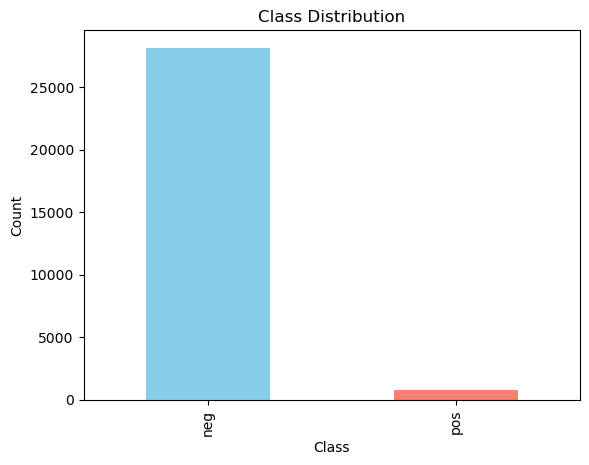

In [9]:
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = train_data["class"].value_counts()

# Plot
class_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [10]:
#Checking percentage of each class
per_neg_class = (class_counts['neg']/(class_counts['neg'] + class_counts['pos']))*100
per_pos_class = (class_counts['pos']/(class_counts['neg'] + class_counts['pos']))*100
print(f"Percetage of Pos class : {per_pos_class}")
print(f"Percetage of Neg class : {per_neg_class}")

Percetage of Pos class : 2.763385146804836
Percetage of Neg class : 97.23661485319516


#### Inference : 
- The data is highly imbalanced

Solution :
- Must find out a method which is best for handling imbalance in the dataset

### Checking the NaN values in the dataset

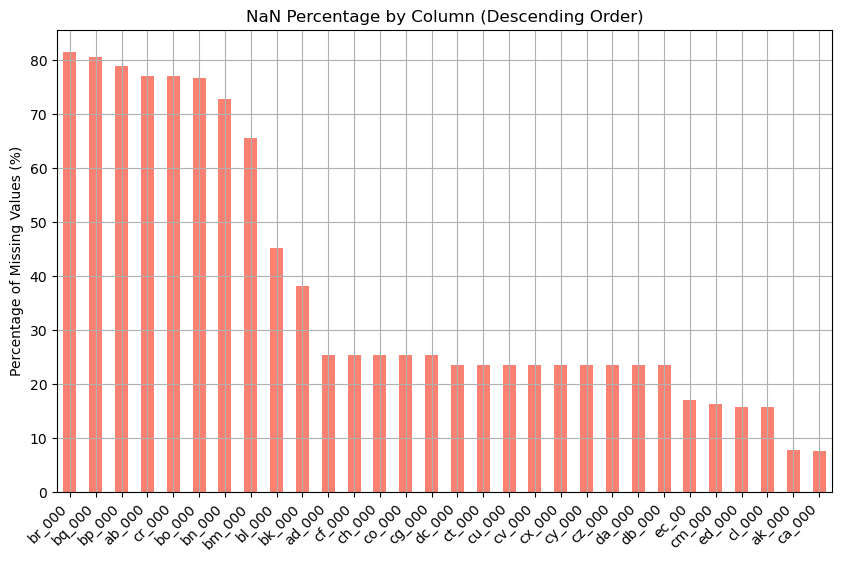

In [11]:
# Checking NaN values in the dataset and plotting top 30 columns with highest NaN values
nan_percent = train_data.isna().sum() / len(train_data) * 100
nan_percent = nan_percent.sort_values(ascending=False)

top_n = 30
plt.figure(figsize=(10,6))
nan_percent.head(top_n).plot(kind="bar", color="salmon")
plt.ylabel("Percentage of Missing Values (%)")
plt.title("NaN Percentage by Column (Descending Order)")
plt.xticks(rotation=45, ha="right")
plt.grid()
plt.show()

#### Inference : 
- High percentage of NaN values can be observed in the several columns in the dataset.

Solution : 
- Must find out the best method for imputation of the NaN values

### Checking the duplicates in the dataset

In [12]:
train_data.duplicated().sum()

0

#### Inference : No duplicate in the dataset

### Segregating the numerical and the categorical columns from the independent columns of the dataframe

In [13]:
numeric_train_data = [column for column in train_data.columns if train_data[column].dtype != 'O']
categorical_train_data = [column for column in train_data.columns if train_data[column].dtype == 'O']

#### Inference : All the independent columns are numerical in nature.

### Checking the distribution of Numeric Columns

In [14]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Number of columns
# n_cols = len(numeric_train_data)

# # Define grid size (say 3 columns in subplot grid)
# n_rows = (n_cols // 3) + (n_cols % 3 > 0)   # auto-calc rows

# fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
# axes = axes.flatten()  # flatten 2D array of axes for easy iteration

# # Loop through numeric columns
# for i, col in enumerate(numeric_train_data):
#     axes[i].hist(train_data[col].dropna(), bins=15, color="skyblue", edgecolor="black", density=True)
#     sns.kdeplot(train_data[col].dropna(), ax=axes[i], color='red', linewidth=2)
#     axes[i].set_title(f"PDF of {col}")

# # Hide unused subplots (if any)
# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

#### Inference :
The data is highly right skewed.

### Checking the outliers in the data

In [15]:
independent_columns = train_data.drop('class', axis = 1).columns

In [16]:
import numpy as np

for column in independent_columns:
    data_for_outlier_detection = train_data[column].dropna()
    Q1 = np.percentile(data_for_outlier_detection, 25)
    Q3 = np.percentile(data_for_outlier_detection, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_in_data = data_for_outlier_detection[(data_for_outlier_detection < lower_bound) | (data_for_outlier_detection > upper_bound)]
    if len(outliers_in_data) > 0:
        print(f"Outliers in {column} : {len(outliers_in_data)}")

Outliers in aa_000 : 2750
Outliers in ab_000 : 1308
Outliers in ac_000 : 5189
Outliers in ad_000 : 1965
Outliers in ae_000 : 912
Outliers in af_000 : 950
Outliers in ag_000 : 124
Outliers in ag_001 : 477
Outliers in ag_002 : 1642
Outliers in ag_003 : 6148
Outliers in ag_004 : 4763
Outliers in ag_005 : 3009
Outliers in ag_006 : 1778
Outliers in ag_007 : 1879
Outliers in ag_008 : 3073
Outliers in ag_009 : 5717
Outliers in ah_000 : 2610
Outliers in ai_000 : 2964
Outliers in aj_000 : 6060
Outliers in ak_000 : 194
Outliers in al_000 : 5344
Outliers in am_0 : 5228
Outliers in an_000 : 2624
Outliers in ao_000 : 2677
Outliers in ap_000 : 2872
Outliers in aq_000 : 2576
Outliers in ar_000 : 1178
Outliers in as_000 : 11
Outliers in at_000 : 2917
Outliers in au_000 : 35
Outliers in av_000 : 3773
Outliers in ax_000 : 3234
Outliers in ay_000 : 316
Outliers in ay_001 : 569
Outliers in ay_002 : 581
Outliers in ay_003 : 626
Outliers in ay_004 : 1105
Outliers in ay_005 : 3903
Outliers in ay_006 : 1791
O

#### Inference :
The data has a lot of outliers.

Solution : 
- Appropriate methods to solve outliers problem.

## Final inferences after EDA process

1. Imbalance data : Must find out a method which is best for handling imbalance in the dataset.
2. NaN values : Must find out the best method for imputation of the NaN values.
3. Outliers in data : Appropriate methods to solve outliers problem.

# Find most optimal methods for:
1. Handling Imbalance in the data.
<blockquote>Random Undersampling</blockquote>
<blockquote>SMOTE</blockquote>
<blockquote>ADASYN</blockquote>
<blockquote>Random Oversampling</blockquote>
<blockquote>Tomek links</blockquote>
<blockquote>NearMiss</blockquote>
<blockquote>Cost-Sensative Learning</blockquote>
<blockquote>Hybrid Methods (combining Undersampling and Oversampling)</blockquote>

2. Handling NaN values in the data.
<blockquote>Simple Imputing (Mean/Median/Constant)</blockquote>
<blockquote>KNN imputing</blockquote>

3. Handling Outliers in the data.

<blockquote>
    <p>Reducing the skewness of the data</p>
<blockquote>
    <p>Either remove the outliers from the data.</p>
    <p>Cap the outliers with a threshold limit.</p>
    <p>Transform the data using techniques like log-normal transformations.</p>
</blockquote>
    <p>Keep the outliers as it is</p>
<blockquote>
    <p>Peform an appropriate Scaling technique.</p>
</blockquote>
</blockquote>

## Feature Engineering

### Preliminary test for Nan values in data (Chi-Squared test)
Performing the chi-squared test to know whether the columns with more than 50% Nan values has some pattern associated with Nan values or not.
- If no : Delete the columns.
- If yes : Keep the columns

In [17]:
from scipy.stats import chi2_contingency

percentage_of_higher_nan = 70
nan_percent = train_data.isna().sum() / len(train_data) * 100
nan_columns_higher_perc = nan_percent[nan_percent > percentage_of_higher_nan].index

to_delete_columns = []

for column in nan_columns_higher_perc:

    contingency_table = pd.crosstab(train_data['class'], train_data[column].isna())
    
    # 2. Perform the Chi-Squared Test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # 3. Interpret the Result
    print(f"P-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"{column} : Recommendation: DO NOT DELETE this column. The missingness pattern is predictive.")
    else:
        print(f"{column} : Recommendation: This provides justification that you COULD delete this column.")
        to_delete_columns.append(column)
    print('\n')

P-value = 0.9125
ab_000 : Recommendation: This provides justification that you COULD delete this column.


P-value = 0.0000
bn_000 : Recommendation: DO NOT DELETE this column. The missingness pattern is predictive.


P-value = 0.0000
bo_000 : Recommendation: DO NOT DELETE this column. The missingness pattern is predictive.


P-value = 0.0000
bp_000 : Recommendation: DO NOT DELETE this column. The missingness pattern is predictive.


P-value = 0.0000
bq_000 : Recommendation: DO NOT DELETE this column. The missingness pattern is predictive.


P-value = 0.0000
br_000 : Recommendation: DO NOT DELETE this column. The missingness pattern is predictive.


P-value = 0.9125
cr_000 : Recommendation: This provides justification that you COULD delete this column.




### Finding the most optimal Nan value, Imbalance and outlier methods
Let's explore most optimal method with `GridSearchCV`. Before that we need to do some pre-processing on the data.
- Imputation method : We will explore Simple Imputing (Mean/Median/Constant), KNN imputing and MICE methods
- Handling Imbalance data : Random Undersampling, SMOTE, ADASYN, Random Oversampling, Tomek links, NearMiss, Cost-Sensative Learning, Hybrid Methods (combining Undersampling and Oversampling)

#### Experiment 1
In this experiment we will impute all Nan columns with same imputation method + Dropping to_delete_columns columns

##### Creating model

In [ ]:
train_data1 = train_data.copy()
train_data1 = train_data1.drop(to_delete_columns, axis = 1)
train_data1['class'] = train_data1['class'].map({'neg': 0, 'pos': 1})
X_train_1 = train_data1.drop('class', axis = 1)
y_train_1 = train_data1[['class']]

In [ ]:
#Training pipeline
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler

# scale_pos_weight_value = np.sum(y_train_1 == 0) / np.sum(y_train_1 == 1)

pipeline = Pipeline(
    steps=[
        ('scaler', RobustScaler()),
        ('imputer', None),
        ('imbalance', None),
        ('classifier', None)
    ]
)

param_grid = [
    #Experiment 1
    {
        'imputer' : [
#             SimpleImputer(strategy='mean'),
            SimpleImputer(strategy='median'),
#             SimpleImputer(strategy='constant', fill_value=0),
#             KNNImputer(n_neighbors=5)
        ],
        'imbalance' : [
#             SMOTETomek(random_state=42), # Hybrid: SMOTE followed by Tomek Links
            RandomUnderSampler(random_state=42),
#             SMOTE(random_state=42),
#             ADASYN(random_state=42),
#             RandomOverSampler(random_state=42),
#             TomekLinks()
        ],
        'classifier' : [
#             LogisticRegression(penalty='l2', solver='liblinear', max_iter=5000),
#             LogisticRegression(penalty='l1', solver='liblinear', max_iter=5000),
#             KNeighborsClassifier(metric='minkowski', n_neighbors = 5),
#             SVC(random_state=42),
#             DecisionTreeClassifier(random_state=42),
#             RandomForestClassifier(random_state=42),
#             GradientBoostingClassifier(random_state=42),
            XGBClassifier(random_state=42)
        ]
    }
#     #Experiment 2
#     {
#         'imputer' : [
#             SimpleImputer(strategy='mean'),
#             SimpleImputer(strategy='median'),
#             SimpleImputer(strategy='constant', fill_value=0),
#             KNNImputer(n_neighbors=5)
#         ],
#         'imbalance' : [
#             "passthrough"
#         ],
#         'classifier' : [
#             DecisionTreeClassifier(random_state=42, class_weight='balanced'),
#             RandomForestClassifier(random_state=42, class_weight='balanced'),
#             XGBClassifier(random_state=42,  scale_pos_weight=scale_pos_weight_value)
#         ]
#     }
]

# Custom scorer
def total_cost_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = (10 * fp) + (500 * fn)
    return cost

# We want to MINIMIZE cost, so lower is better
custom_scorer = make_scorer(total_cost_scorer, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=custom_scorer,
    cv=5,
    verbose=4
)

# Fitting
grid_search.fit(X_train_1, y_train_1)

##### Testing on test data

In [ ]:
#Pre-processing test data
test_data_1 = pd.concat([y_test, X_test], axis=1).reset_index(drop = True)
test_data_1 = test_data_1.drop(to_delete_columns, axis = 1)
test_data_1['class'] = test_data_1['class'].map({'neg': 0, 'pos': 1})
X_test_1 = test_data_1.drop('class', axis = 1)
y_test_1 = test_data_1[['class']]

#fitting in the pipeline
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_1 = best_model.predict(X_test_1)
y_proba_1 = best_model.predict_proba(X_test_1)[:, 1]

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, classification_report
)

print("Accuracy:", accuracy_score(y_test_1, y_pred_1))
print("Precision:", precision_score(y_test_1, y_pred_1))
print("Recall:", recall_score(y_test_1, y_pred_1))
print("F1 Score:", f1_score(y_test_1, y_pred_1))
print("ROC AUC:", roc_auc_score(y_test_1, y_pred_1))

print("\nConfusion Matrix:\n", confusion_matrix(y_test_1, y_pred_1))
print("\nClassification Report:\n", classification_report(y_test_1, y_pred_1))

final_cost_1 = total_cost_scorer(y_test_1, y_pred_1)
print(f"Final Total Cost on Test Data: {final_cost_1}")

#### Experiment 2
In this experiment we will impute columns with more than 70% of Nan values with constant imputation method and all other columns with other imputation method + dropping to_delete_columns columns.

##### Creating model

In [ ]:
train_data_2 = train_data.copy()
train_data_2 = train_data_2.drop(to_delete_columns, axis = 1)
for col in nan_columns_higher_perc:
    if col not in to_delete_columns:
        train_data_2[col].fillna(0, inplace=True)
train_data_2['class'] = train_data_2['class'].map({'neg': 0, 'pos': 1})
X_train_2 = train_data_2.drop('class', axis = 1)
y_train_2 = train_data_2[['class']]

In [ ]:
#Training pipeline
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler

# scale_pos_weight_value_2 = np.sum(y_train_2 == 0) / np.sum(y_train_2 == 1)

pipeline_2 = Pipeline(
    steps=[
        ('scaler', RobustScaler()),
        ('imputer', None),
        ('imbalance', None),
        ('classifier', None)
    ]
)

param_grid_2 = [
    #Experiment 1
    {
        'imputer' : [
#             SimpleImputer(strategy='mean'),
            SimpleImputer(strategy='median'),
#             SimpleImputer(strategy='constant', fill_value=0),
#             KNNImputer(n_neighbors=5)
        ],
        'imbalance' : [
#             SMOTETomek(random_state=42), # Hybrid: SMOTE followed by Tomek Links
            RandomUnderSampler(random_state=42),
#             SMOTE(random_state=42),
#             ADASYN(random_state=42),
#             RandomOverSampler(random_state=42),
#             TomekLinks()
        ],
        'classifier' : [
#             LogisticRegression(penalty='l2', solver='liblinear', max_iter=5000),
#             LogisticRegression(penalty='l1', solver='liblinear', max_iter=5000),
#             KNeighborsClassifier(metric='minkowski', n_neighbors = 5),
#             SVC(random_state=42),
#             DecisionTreeClassifier(random_state=42),
#             RandomForestClassifier(random_state=42),
#             GradientBoostingClassifier(random_state=42),
            XGBClassifier(random_state=42)
        ]
    }
#     #Experiment 2
#     {
#         'imputer' : [
#             SimpleImputer(strategy='mean'),
#             SimpleImputer(strategy='median'),
#             SimpleImputer(strategy='constant', fill_value=0),
#             KNNImputer(n_neighbors=5)
#         ],
#         'imbalance' : [
#             "passthrough"
#         ],
#         'classifier' : [
#             DecisionTreeClassifier(random_state=42, class_weight='balanced'),
#             RandomForestClassifier(random_state=42, class_weight='balanced'),
#             XGBClassifier(random_state=42,  scale_pos_weight=scale_pos_weight_value_2)
#         ]
#     }
]

# Custom scorer
def total_cost_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = (10 * fp) + (500 * fn)
    return cost

# We want to MINIMIZE cost, so lower is better
custom_scorer_2 = make_scorer(total_cost_scorer, greater_is_better=False)

grid_search_2 = GridSearchCV(
    estimator=pipeline_2,
    param_grid=param_grid_2,
    scoring=custom_scorer_2,
    cv=5,
    verbose=4
)

# Fitting
grid_search_2.fit(X_train_2, y_train_2)

##### Testing model

In [ ]:
#Pre-processing test data
test_data_2 = pd.concat([y_test, X_test], axis=1).reset_index(drop = True)

test_data_2 = test_data_2.drop(to_delete_columns, axis = 1)
for col in nan_columns_higher_perc:
    if col not in to_delete_columns:
        test_data_2[col].fillna(0, inplace=True)
test_data_2['class'] = test_data_2['class'].map({'neg': 0, 'pos': 1})
X_test_2 = test_data_2.drop('class', axis = 1)
y_test_2 = test_data_2[['class']]

#fitting in the pipeline
best_model_2 = grid_search_2.best_estimator_
best_params_2 = grid_search_2.best_params_

y_pred_2 = best_model_2.predict(X_test_2)
y_proba_2 = best_model_2.predict_proba(X_test_2)[:, 1]

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, classification_report
)

print("Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("Precision:", precision_score(y_test_2, y_pred_2))
print("Recall:", recall_score(y_test_2, y_pred_2))
print("F1 Score:", f1_score(y_test_2, y_pred_2))
print("ROC AUC:", roc_auc_score(y_test_2, y_proba_2))

print("\nConfusion Matrix:\n", confusion_matrix(y_test_2, y_pred_2))
print("\nClassification Report:\n", classification_report(y_test_2, y_pred_2))

final_cost_2 = total_cost_scorer(y_test_2, y_pred_2)
print(f"Final Total Cost on Test Data: {final_cost_2}")

#### Experiment 3
In this i am removing all the columns with more than 70% of Nan values.

##### Creating model

In [ ]:
train_data_3 = train_data.copy()
for col in nan_columns_higher_perc:
    train_data_3 = train_data_3.drop(col, axis = 1)
train_data_3['class'] = train_data_3['class'].map({'neg': 0, 'pos': 1})
X_train_3 = train_data_3.drop('class', axis = 1)
y_train_3 = train_data_3[['class']]

In [ ]:
#Training pipeline
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler

# scale_pos_weight_value_3 = np.sum(train_data_3 == 0) / np.sum(train_data_3 == 1)

pipeline_3 = Pipeline(
    steps=[
        ('scaler', RobustScaler()),
        ('imputer', None),
        ('imbalance', None),
        ('classifier', None)
    ]
)

param_grid_3 = [
    #Experiment 1
    {
        'imputer' : [
            SimpleImputer(strategy='mean'),
            SimpleImputer(strategy='median'),
            SimpleImputer(strategy='constant', fill_value=0),
#             KNNImputer(n_neighbors=5)
        ],
        'imbalance' : [
#             SMOTETomek(random_state=42), # Hybrid: SMOTE followed by Tomek Links
            RandomUnderSampler(random_state=42),
#             SMOTE(random_state=42),
#             ADASYN(random_state=42),
#             RandomOverSampler(random_state=42),
#             TomekLinks()
        ],
        'classifier' : [
#             LogisticRegression(penalty='l2', solver='liblinear', max_iter=5000),
#             LogisticRegression(penalty='l1', solver='liblinear', max_iter=5000),
#             KNeighborsClassifier(metric='minkowski', n_neighbors = 5),
#             SVC(random_state=42),
#             DecisionTreeClassifier(random_state=42),
#             RandomForestClassifier(random_state=42),
#             GradientBoostingClassifier(random_state=42),
            XGBClassifier(random_state=42)
        ]
    }
#     #Experiment 2
#     {
#         'imputer' : [
#             SimpleImputer(strategy='mean'),
#             SimpleImputer(strategy='median'),
#             SimpleImputer(strategy='constant', fill_value=0),
#             KNNImputer(n_neighbors=5)
#         ],
#         'imbalance' : [
#             "passthrough"
#         ],
#         'classifier' : [
# #             DecisionTreeClassifier(random_state=42, class_weight='balanced'),
# #             RandomForestClassifier(random_state=42, class_weight='balanced'),
#             XGBClassifier(random_state=42,  scale_pos_weight=scale_pos_weight_value_2)
#         ]
#     }
]

# Custom scorer
def total_cost_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = (10 * fp) + (500 * fn)
    return cost

# We want to MINIMIZE cost, so lower is better
custom_scorer_3 = make_scorer(total_cost_scorer, greater_is_better=False)

grid_search_3 = GridSearchCV(
    estimator=pipeline_3,
    param_grid=param_grid_3,
    scoring=custom_scorer_3,
    cv=5,
    verbose=4
)

# Fitting
grid_search_3.fit(X_train_3, y_train_3)

##### Testing model

In [ ]:
#Pre-processing test data
test_data_3 = pd.concat([y_test, X_test], axis=1).reset_index(drop = True)
test_data_3 = test_data_3.drop(nan_columns_higher_perc, axis = 1)
test_data_3['class'] = test_data_3['class'].map({'neg': 0, 'pos': 1})
X_test_3 = test_data_3.drop('class', axis = 1)
y_test_3 = test_data_3[['class']]

#fitting in the pipeline
best_model_3 = grid_search_3.best_estimator_
best_params_3 = grid_search_3.best_params_

y_pred_3 = best_model_3.predict(X_test_3)
y_proba_3 = best_model_3.predict_proba(X_test_3)[:, 1]

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, classification_report
)

print("Accuracy:", accuracy_score(y_test_3, y_pred_3))
print("Precision:", precision_score(y_test_3, y_pred_3))
print("Recall:", recall_score(y_test_3, y_pred_3))
print("F1 Score:", f1_score(y_test_3, y_pred_3))
print("ROC AUC:", roc_auc_score(y_test_3, y_proba_3))

print("\nConfusion Matrix:\n", confusion_matrix(y_test_3, y_pred_3))
print("\nClassification Report:\n", classification_report(y_test_3, y_pred_3))

final_cost_3 = total_cost_scorer(y_test_3, y_pred_3)
print(f"Final Total Cost on Test Data: {final_cost_3}")

### Best model : 
Experiment 1
- Classifier : XGBoost()
- Imputer : Simple Imputer(Median)
- Imbalance : RandomUndersampling()

In this experiment we will impute all Nan columns with same imputation method + Dropping to_delete_columns columns.

### Further enhancing the XGBoost model

In [18]:
train_data4 = train_data.copy()
train_data4 = train_data4.drop(to_delete_columns, axis = 1)
train_data4['class'] = train_data4['class'].map({'neg': 0, 'pos': 1})
X_train_4 = train_data4.drop('class', axis = 1)
y_train_4 = train_data4[['class']]

In [19]:
#Training pipeline
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler

pipeline_4 = Pipeline(
    steps=[
        ('scaler', RobustScaler()),
        ('imputer', None),
        ('imbalance', None),
        ('classifier', None)
    ]
)

param_grid_4 = [
    {
        'imputer' : [
            SimpleImputer(strategy='median')
        ],
        'imbalance' : [
            RandomUnderSampler(random_state=42)
        ],
        'classifier' : [
            XGBClassifier(random_state=42)
        ],
        'classifier__n_estimators': [100, 300, 500],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__subsample': [0.8, 1.0],
        'classifier__colsample_bytree': [0.8, 1.0],
        'classifier__gamma': [0, 1, 5],
        'classifier__reg_lambda': [0, 1, 5],
    }
]

# Custom scorer
def total_cost_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = (10 * fp) + (500 * fn)
    return cost

# We want to MINIMIZE cost, so lower is better
custom_scorer_4 = make_scorer(total_cost_scorer, greater_is_better=False)

grid_search_4 = GridSearchCV(
    estimator=pipeline_4,
    param_grid=param_grid_4,
    scoring=custom_scorer_4,
    cv=5,
    verbose=4
)

# Fitting
grid_search_4.fit(X_train_4, y_train_4)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV 1/5] END classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42,
              reg_alpha=None, reg_lambda=None, ...), classifier__colsample_bytree=0.8, classifier__gamma=0, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__reg_lambda=0, clas

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('imputer', None), ('imbalance', None),
                                       ('classifier', None)]),
             param_grid=[{'classifier': [XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       g...
                          'classifier__learning_rate': [0.01, 0.05, 0.1],
                          'classifier__max_depth': [3, 5, 7],
                          'classifier__n_estimators': [100, 300, 500],
                          'classifier__reg_lambda': [0, 1, 5],
                          'classifier__subsample': [0.8, 1.0],
                          'imbalance': [RandomUnderSampler(random_state=42)],
                          'imputer': [SimpleImputer(strategy='median')]}],
             scoring=make_scorer(total_cost_scorer, greater_is_better=False, response_method='predict'),
             verbose=4)

In [22]:
#Pre-processing test data
test_data_4 = pd.concat([y_test, X_test], axis=1).reset_index(drop = True)
test_data_4 = test_data_4.drop(to_delete_columns, axis = 1)
test_data_4['class'] = test_data_4['class'].map({'neg': 0, 'pos': 1})
X_test_4 = test_data_4.drop('class', axis = 1)
y_test_4 = test_data_4[['class']]

#fitting in the pipeline
best_model_4 = grid_search_4.best_estimator_
best_params_4 = grid_search_4.best_params_

y_pred_4 = best_model_4.predict(X_test_4)
y_proba_4 = best_model_4.predict_proba(X_test_4)[:, 1]

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, classification_report
)

print("Accuracy:", accuracy_score(y_test_4, y_pred_4))
print("Precision:", precision_score(y_test_4, y_pred_4))
print("Recall:", recall_score(y_test_4, y_pred_4))
print("F1 Score:", f1_score(y_test_4, y_pred_4))
print("ROC AUC:", roc_auc_score(y_test_4, y_pred_4))

print("\nConfusion Matrix:\n", confusion_matrix(y_test_4, y_pred_4))
print("\nClassification Report:\n", classification_report(y_test_4, y_pred_4))

final_cost_4 = total_cost_scorer(y_test_4, y_pred_4)
print(f"Final Total Cost on Test Data: {final_cost_4}")

Accuracy: 0.9568941696601271
Precision: 0.38755020080321284
Recall: 0.965
F1 Score: 0.5530085959885387
ROC AUC: 0.9608319124751349

Confusion Matrix:
 [[6733  305]
 [   7  193]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      7038
           1       0.39      0.96      0.55       200

    accuracy                           0.96      7238
   macro avg       0.69      0.96      0.77      7238
weighted avg       0.98      0.96      0.97      7238

Final Total Cost on Test Data: 6550
